In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
df = pd.read_csv('Datasets/hair_loss.csv')
df.head()

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,hair_fall
0,312,100,14,249,87,55,333,44,41,368,4
1,52,207,3,425,387,1,182,26,65,41,1
2,170,197,11,140,199,91,414,30,54,90,4
3,256,334,19,358,120,3,35,48,45,65,2
4,309,185,58,207,329,301,345,23,90,346,4


In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
k_best = SelectKBest(score_func=f_classif, k=5) 

In [11]:
X_train_kbest = k_best.fit_transform(X_train, y_train)


In [12]:
X_test_kbest = k_best.transform(X_test)

In [13]:
selected_features_kbest = k_best.get_support(indices=True)

In [14]:
print("Selected features with SelectKBest:", X.columns[selected_features_kbest])

Selected features with SelectKBest: Index(['total_keratine', 'hair_texture', 'vitamin', 'manganese', 'liver_data'], dtype='object')


In [15]:
from sklearn.feature_selection import SelectPercentile, f_classif

# Apply SelectPercentile
percentile_selector = SelectPercentile(score_func=f_classif, percentile=50)  # Select top 50% features
X_train_percentile = percentile_selector.fit_transform(X_train, y_train)
X_test_percentile = percentile_selector.transform(X_test)

In [16]:
# Get the indices of the selected features
selected_features_percentile = percentile_selector.get_support(indices=True)

# Print the selected features
print("Selected features with SelectPercentile:", X.columns[selected_features_percentile])

Selected features with SelectPercentile: Index(['total_keratine', 'hair_texture', 'vitamin', 'manganese', 'liver_data'], dtype='object')


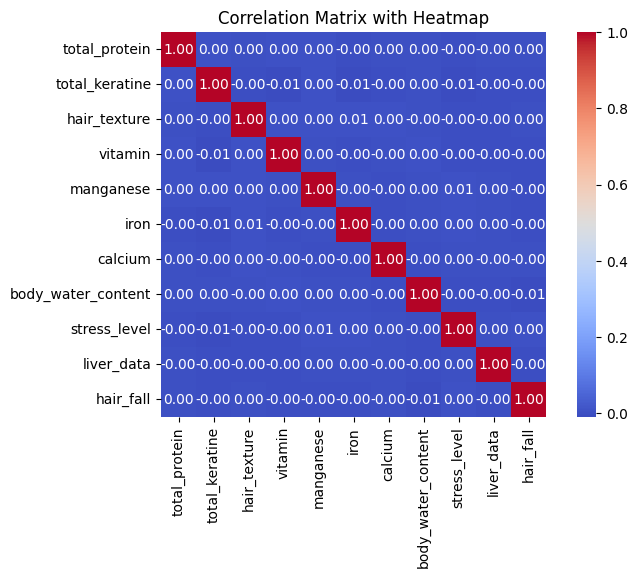

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 5))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Add title
plt.title('Correlation Matrix with Heatmap')

# Show plot
plt.show()
